In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def czytajS(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        data = data.T
        return data

In [3]:
def czytajU(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        return data

In [4]:
folder = ''
nazwy = ["u_at_5000", "wart_S"]

for n in nazwy :
    plik = f'{n}.txt'
    sciezka = os.path.join(folder, plik)
    if os.path.exists(sciezka):
        print(f"Otwieranie {plik}")
        if n == "u_at_5000" :
            u500 = czytajU(sciezka)
        if n == "wart_S" :
            wartS1 = czytajS(sciezka)
    else:
        print(f"nie istnieje.")

Otwieranie u_at_5000.txt
Otwieranie wart_S.txt


In [5]:
u500 = u500.T

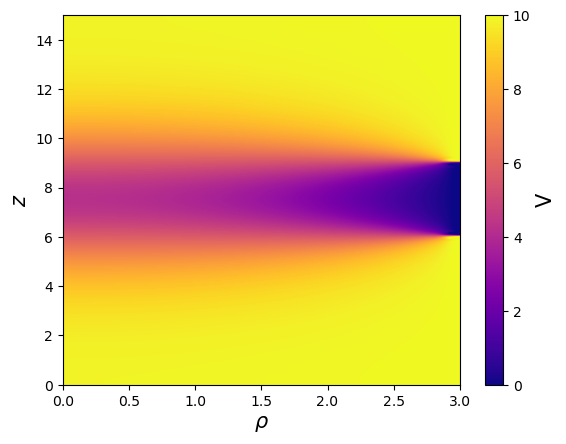

In [57]:
fs = 15
# plt.figure(figsize=(10,10))
plt.imshow(u500, cmap='plasma', interpolation='spline36', extent=[0, 3, 0, 15], aspect = 'auto')
plt.colorbar(label='U').set_label('V', fontsize=fs)
# plt.axis('equal')
plt.xlabel(r"$\rho$", fontsize = fs)
plt.ylabel(r"$z$", fontsize = fs)
# plt.title(f'a)', fontsize = fs)
plt.show()

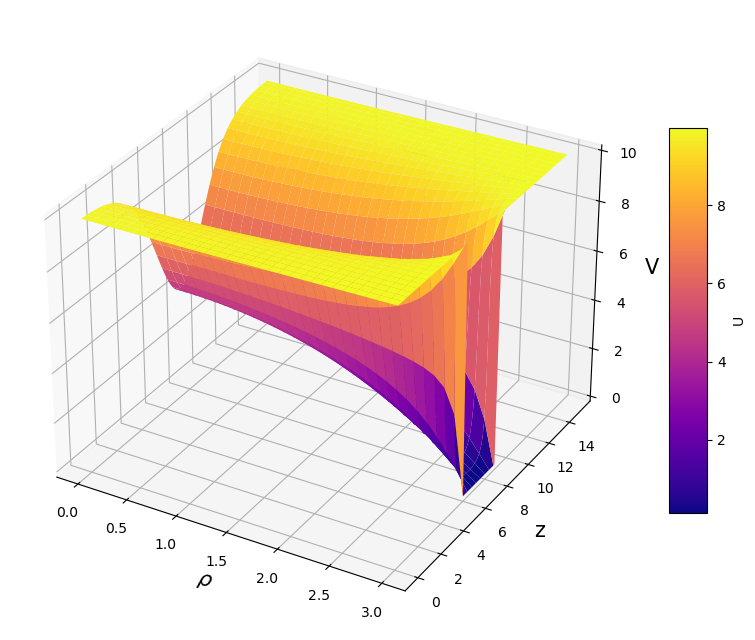

In [56]:
ny, nx = u500.shape
x = np.linspace(0, 3, nx)
y = np.linspace(0, 15, ny)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, u500, cmap='plasma', edgecolor='none')

ax.set_xlabel(r'$\rho$', fontsize=fs)
ax.set_ylabel('z', fontsize=fs)
ax.set_zlabel('V', fontsize=fs)
# ax.set_title('', fontsize=fs)

fig.colorbar(surf, shrink=0.5, aspect=10, label='U')

plt.show()

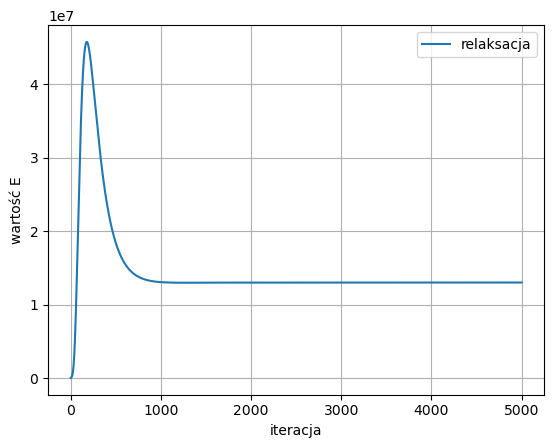

In [41]:
plt.plot(wartS1[0], wartS1[1], '-', label = "relaksacja")
plt.legend(loc='upper right')           
plt.xlabel("iteracja", fontsize = fs-5)
plt.ylabel("wartość E", fontsize = fs-5)
plt.grid()
plt.show()

Dopasowana parabola: y = 0.719x² + -10.712x + 44.131
Dopasowana parabola: y = -0.541x² + 0.206x + 4.187


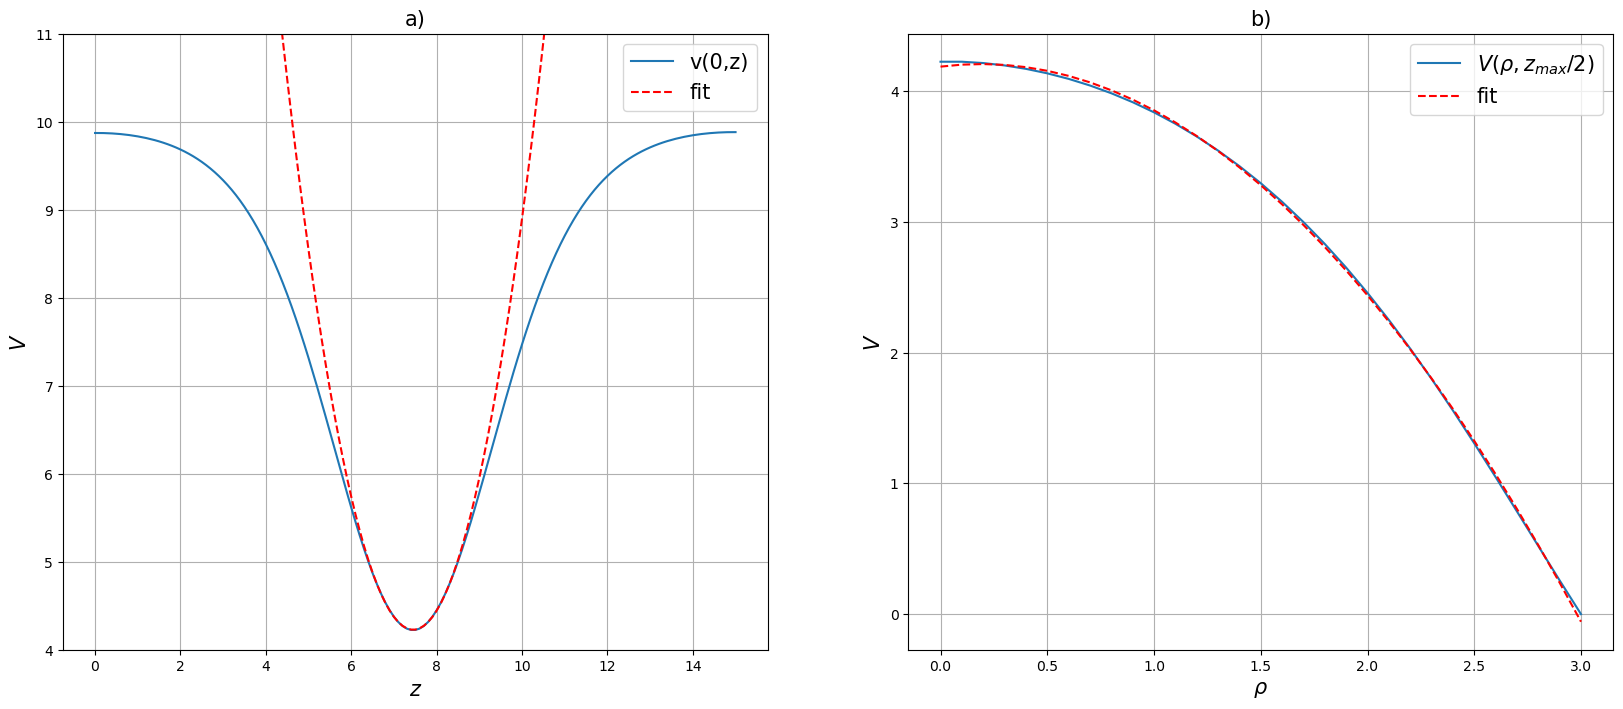

In [63]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

oSym = u500.T[0]
zSym = np.linspace(0, 15, oSym.size)

id=65
ig=85

x = zSym[id:ig]
y = oSym[id:ig]

coeffs = np.polyfit(x, y, 2)
a, b, c = coeffs
print(f'Dopasowana parabola: y = {a:.3f}x² + {b:.3f}x + {c:.3f}')

x_fit = np.linspace(min(zSym), max(zSym), 151)
y_fit = a * x_fit**2 + b * x_fit + c

plt.plot(zSym, oSym, label="v(0,z)")
plt.plot(zSym, y_fit, '--', color='red', label='fit')
plt.legend(loc="upper right", fontsize = fs)
plt.ylim(4,11)
plt.title("a)", fontsize = fs)
plt.xlabel(r"$z$", fontsize = fs)
plt.ylabel(r"$V$", fontsize = fs)
plt.grid()

plt.subplot(1,2,2)
uZp = u500[75]
roZp = np.linspace(0, 3, uZp.size)

id=0
ig=-1

x = roZp[id:ig]
y = uZp[id:ig]

coeffs = np.polyfit(x, y, 2)
a, b, c = coeffs
print(f'Dopasowana parabola: y = {a:.3f}x² + {b:.3f}x + {c:.3f}')

x_fit = np.linspace(min(roZp), max(roZp), 31)
y_fit = a * x_fit**2 + b * x_fit + c

plt.plot(roZp, uZp, label=r'$V(\rho,z_{max}/2)$')
plt.plot(roZp, y_fit, '--', color='red', label='fit')
plt.legend(loc="upper right", fontsize = fs)
plt.title("b)", fontsize = fs)
plt.xlabel(r"$\rho$", fontsize = fs)
plt.ylabel(r"$V$", fontsize = fs)
plt.grid()
plt.show()

Dopasowana parabola: y = -0.541x² + 0.206x + 4.187


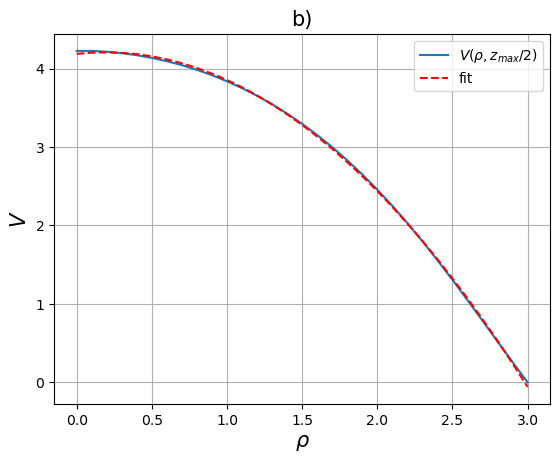

In [40]:
uZp = u500[75]
roZp = np.linspace(0, 3, uZp.size)

id=0
ig=-1

x = roZp[id:ig]
y = uZp[id:ig]

coeffs = np.polyfit(x, y, 2)
a, b, c = coeffs
print(f'Dopasowana parabola: y = {a:.3f}x² + {b:.3f}x + {c:.3f}')

x_fit = np.linspace(min(roZp), max(roZp), 31)
y_fit = a * x_fit**2 + b * x_fit + c

plt.plot(roZp, uZp, label=r'$V(\rho,z_{max}/2)$')
plt.plot(roZp, y_fit, '--', color='red', label='fit')
plt.legend(loc="upper right")
plt.title("b)", fontsize = fs)
plt.xlabel(r"$\rho$", fontsize = fs)
plt.ylabel(r"$V$", fontsize = fs)
plt.grid()
plt.show()